In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy.optimize import leastsq

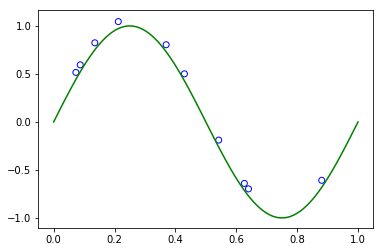

In [11]:
N=10
x_train=np.random.rand(N)
y_train=np.sin(2*np.pi*x_train)+np.random.uniform(0,0.1)
x= np.linspace(0, 1, 100)
y =np.sin(2*np.pi*x)

plt.scatter(x_train,y_train,facecolor="none",edgecolor="blue")
plt.plot(x,y,color='green')
plt.show()


In [12]:
#change degree

In [13]:
def real_func(x):
    return np.sin(2 * np.pi * x)
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)
def residuals_func(p, y, x):
    ret = fit_func(p, x) - y
    return ret 
x = np.linspace(0, 1, N)
x_points = np.linspace(0, 1, 100)
y0 = real_func(x)
y1 = [np.random.normal(0, 0.1) + y for y in y0] 

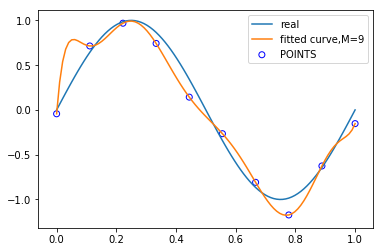

In [28]:
p_init = np.random.randn(10)  # initialize
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=9')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

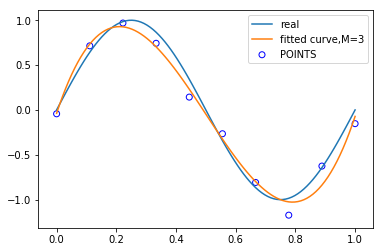

In [29]:
p_init = np.random.randn(4)  
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=3')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

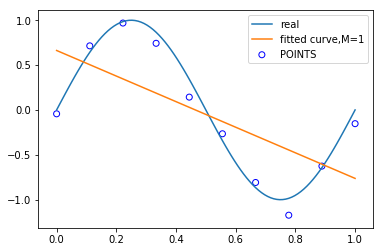

In [30]:
p_init = np.random.randn(2) 
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=1')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

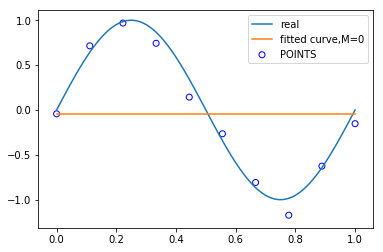

In [32]:
p_init = np.random.randn(1)
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=0')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

In [34]:
#RMSE

In [36]:
def rmse(m, n):
    return np.sqrt(np.mean(np.square(m - n)))

In [37]:
error_train= []
error_test = []
x_train=np.random.rand(10)
y_train= real_func(x_train)
x_test = np.linspace(0, 1, 100)
y_test = real_func(x_test)+np.random.uniform(0,0.1)

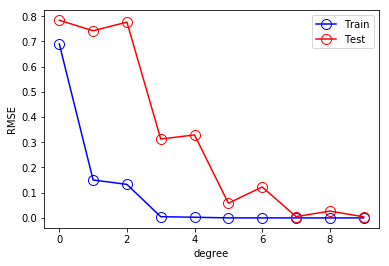

In [38]:
for i in range(10):
    p_init = np.random.randn(i+1)
    plsq1 = leastsq(residuals_func, p_init, args=(y_train, x_train))
    r_train=rmse(fit_func(plsq1[0], x_train),y_train)
    r_test=rmse(fit_func(plsq1[0], x_test), y_test)
    error_train.append(r_train)
    error_test.append(r_test)
plt.plot(error_train, 'o-', mfc="none", mec="blue", ms=10, c="blue", label="Train")
plt.plot(error_test, 'o-', mfc="none", mec="red", ms=10, c="red", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

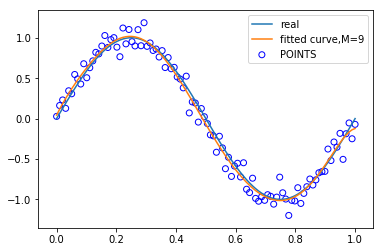

In [39]:
#Add Sample

N=100
x = np.linspace(0, 1, N)
x_points = np.linspace(0, 1, 100)
y0 = real_func(x)
y1 = [np.random.normal(0, 0.1) + y for y in y0] 

p_init = np.random.randn(9)  # initialize
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=9')
pl.scatter(x, y1,facecolor="none",edgecolor="blue", label='POINTS')
pl.legend()
pl.show()


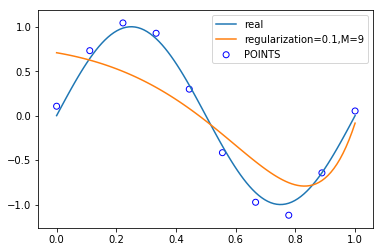

In [40]:
#regularization
regularization = 0.1
def re_residuals_func(p, y, x):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(regularization) * p)   
    return ret
N=10
x = np.linspace(0, 1, N)
x_points = np.linspace(0, 1, 100)
y0 = real_func(x)
y1 = [np.random.normal(0, 0.1) + y for y in y0] 
p_init = np.random.randn(9)  # initialize
plsq = leastsq(re_residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='regularization=0.1,M=9')
pl.scatter(x, y1,facecolor="none",edgecolor="blue", label='POINTS')
pl.legend()
pl.show()